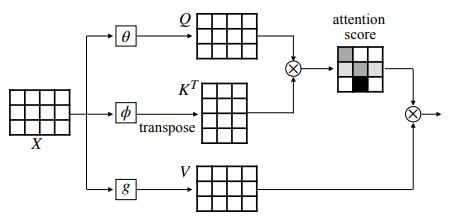

In [23]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)
torch.manual_seed(123)

In [24]:
d_in = inputs.shape[1]
d_out = 3 

# 
w_query = torch.nn.Parameter(torch.rand(d_in,d_out)) # theta
w_key = torch.nn.Parameter(torch.rand(d_in,d_out))   # phi
w_value = torch.nn.Parameter(torch.rand(d_in,d_out))  # g
# 
# matrix multiplication to calculate ( query , key , value )
query = inputs @ w_query
key = inputs @ w_key
value= inputs @ w_value
print(query)

tensor([[0.3522, 0.3244, 0.4020],
        [0.8520, 0.4161, 1.0138],
        [0.8415, 0.4229, 0.9978],
        [0.5096, 0.1904, 0.6187],
        [0.4138, 0.4265, 0.4288],
        [0.6408, 0.1414, 0.8070]], grad_fn=<MmBackward0>)


In [25]:
# calculate attention score
atten_score = query @ key.T

print(atten_score)
print(atten_score.shape)

tensor([[0.7616, 0.8765, 0.8746, 0.4349, 0.5941, 0.4877],
        [1.7872, 2.0141, 2.0091, 0.9952, 1.3538, 1.1227],
        [1.7646, 1.9901, 1.9852, 0.9834, 1.3383, 1.1091],
        [1.0664, 1.1947, 1.1916, 0.5897, 0.8004, 0.6667],
        [0.8601, 0.9968, 0.9950, 0.4947, 0.6817, 0.5516],
        [1.3458, 1.4957, 1.4915, 0.7374, 0.9968, 0.8366]],
       grad_fn=<MmBackward0>)
torch.Size([6, 6])


In [26]:
# calculate attention weight(normaliz attention score) by doing scale by square root 
d_k = key.shape[-1]
atten_weight = torch.softmax(atten_score / d_k ** 0.5, dim=1)
atten_weight

tensor([[0.1747, 0.1866, 0.1864, 0.1446, 0.1586, 0.1491],
        [0.1862, 0.2123, 0.2117, 0.1179, 0.1450, 0.1269],
        [0.1859, 0.2118, 0.2112, 0.1184, 0.1454, 0.1273],
        [0.1798, 0.1936, 0.1932, 0.1365, 0.1542, 0.1427],
        [0.1751, 0.1895, 0.1893, 0.1418, 0.1579, 0.1465],
        [0.1837, 0.2003, 0.1998, 0.1293, 0.1501, 0.1369]],
       grad_fn=<SoftmaxBackward0>)

In [27]:
# calculate context vector by multiplying attention weight by values
context_vec = atten_weight @ value
context_vec

tensor([[0.6692, 1.0276, 1.1106],
        [0.6864, 1.0577, 1.1389],
        [0.6860, 1.0570, 1.1383],
        [0.6738, 1.0361, 1.1180],
        [0.6711, 1.0307, 1.1139],
        [0.6783, 1.0441, 1.1252]], grad_fn=<MmBackward0>)